In [1]:
import numpy as np
import pyswarms as ps
import matplotlib.pyplot as plt

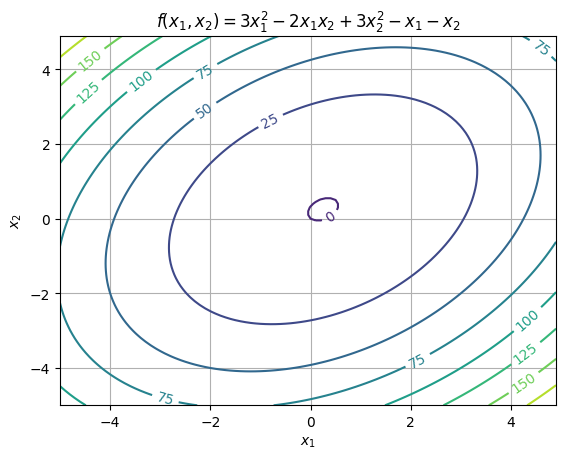

In [2]:
def pers1(X,Y):
    return 3*X**2 - 2*X*Y + 3*Y**2 - X - Y

x = np.vstack((np.array([np.arange(-5,5,0.1)]),
               np.array([np.arange(-5,5,0.1)])))

X,Y = np.meshgrid(x[0], x[1])
Z = pers1(X,Y)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True)
ax.set_title('$ f(x_1, x_2) = 3x_1^2 - 2x_1x_2 + 3x_2^2 - x_1 - x_2 $')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.grid()

In [31]:
# penentuan parameter

# fitness function

def calculate_fitness(x):
    output = pers1(x[:,0],x[:,1])
    print(f"x = {x} \n" )
    print(f"output = {output} \n")
    print("\n")
    return output

In [32]:
from pyswarms.single.global_best import GlobalBestPSO

options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
optimizer = GlobalBestPSO(n_particles=10, dimensions=2, options=options)
cost, pos = optimizer.optimize(calculate_fitness, 2)

2024-03-06 19:41:15,639 - pyswarms.single.global_best - INFO - Optimize for 2 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|2/2, best_cost=-0.239
2024-03-06 19:41:15,646 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.2391431826891155, best pos: [0.27757446 0.31344157]


x = [[0.56542707 0.01422804]
 [0.61518876 0.36937957]
 [0.32227174 0.5533984 ]
 [0.27757446 0.31344157]
 [0.00522286 0.27505077]
 [0.32328813 0.50939025]
 [0.83473467 0.83874587]
 [0.5671589  0.33197911]
 [0.94749339 0.91359036]
 [0.37207643 0.09816877]] 

output = [ 0.36398567  0.10565078 -0.00203288 -0.23914318 -0.05610613 -0.07005709
  1.12708876  0.01993021  1.6048478  -0.09906383] 



x = [[0.56499471 0.06932419]
 [0.68990298 0.50719695]
 [0.63300164 1.10442623]
 [0.40125378 1.06147134]
 [0.24837517 0.59789957]
 [0.85480235 1.06113946]
 [1.60224029 1.54583256]
 [1.25250479 0.50080809]
 [1.0622149  1.53288856]
 [0.4471045  0.23669195]] 

output = [ 0.25942009  0.30271131  1.72571001  1.54861412  0.11424081  1.84004121
  6.76865346  2.45088905  4.58252592 -0.12767199] 





In [33]:
print("Best cost = ", cost)
print("Best pos = ", pos)

Best cost =  -0.2391431826891155
Best pos =  [0.27757446 0.31344157]


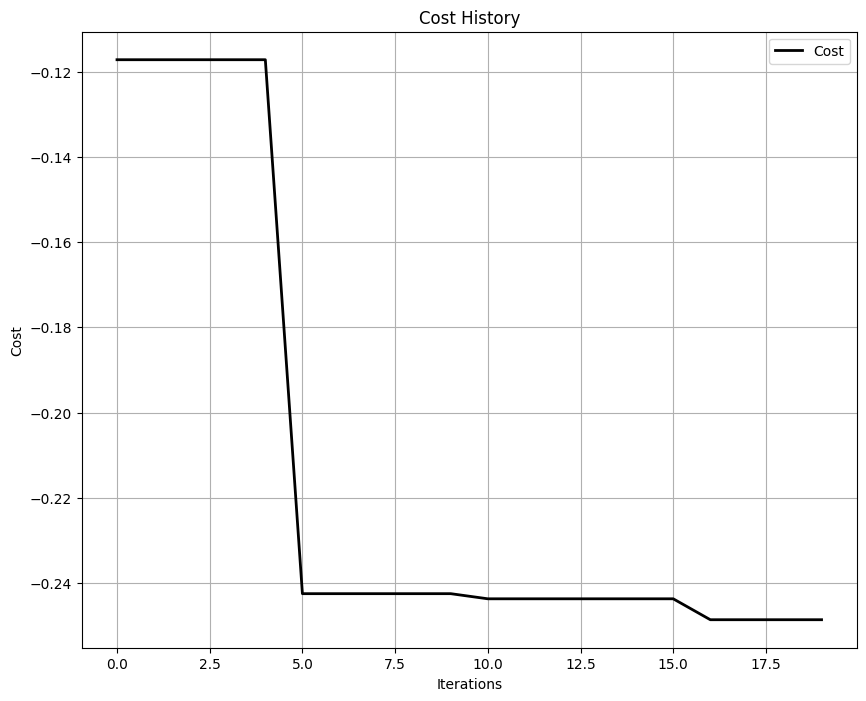

In [6]:
from pyswarms.utils.plotters import (plot_cost_history, plot_contour, plot_surface)

plot_cost_history(cost_history=optimizer.cost_history)
plt.grid()
plt.show()

2024-03-06 19:24:15,916 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.ImageMagickWriter'>
2024-03-06 19:24:15,917 - matplotlib.animation - INFO - MovieWriter._run: running command: convert -size 1000x800 -depth 8 -delay 20.0 -loop 0 rgba:- -layers OptimizePlus plot0.gif


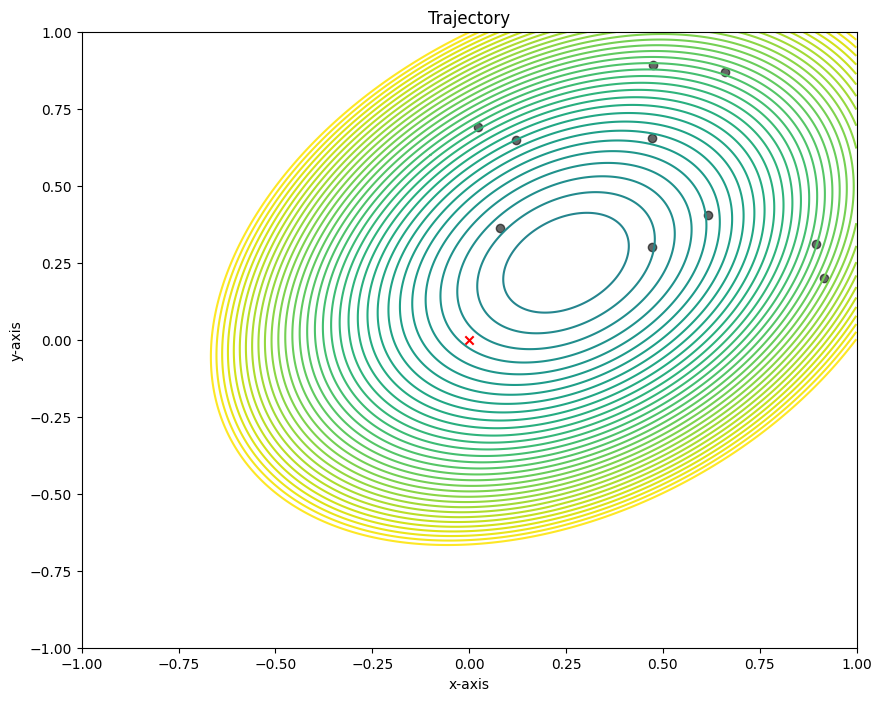

In [7]:
from pyswarms.utils.plotters.formatters import Mesher
from IPython.display import Image

# Initialize mesher with sphere function
m = Mesher(func=calculate_fitness)

#capture
# Make animation
animation = plot_contour(pos_history=optimizer.pos_history,
                         mesher=m,
                         mark=(0,0))


# Enables us to view it in a Jupyter notebook
animation.save('plot0.gif', writer='imagemagick', fps=5)
Image(url='plot0.gif')